In [60]:
#THE DATASET WAS SEGREGATED BETWEEN EXPERTS AND MODEL TESTING IS PERFORMED FOR ONE OF THOSE EXPERT DATA

In [61]:
# LABEL COLUMN = "severity"
# FEATURE USED = "MFCC"

In [1]:
!unzip /content/drive/MyDrive/expert_seg_coughvid/expert_segregated.zip > /dev/null

In [62]:
import pandas as pd
import os
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
cough_audio_data_path = "/content/expert_segregated/audio_files/expert1"

In [64]:
features_path = "/content/expert_segregated/expert_1.csv"

In [65]:
import pandas as pd
df = pd.read_csv(features_path)
df.head()

,Unnamed: 0.1,Unnamed: 0,uuid,cough_detected,age,gender,quality_1,cough_type_1,dyspnea_1,wheezing_1,stridor_1,choking_1,congestion_1,nothing_1,diagnosis_1,severity_1
0,266,266,01ff40e8-63e6-4570-a463-9778ea30cad7,0.9686,24.0,other,poor,dry,False,False,False,False,False,True,healthy_cough,pseudocough
1,476,476,0379c586-c500-483c-83a6-95b63afe6931,0.9916,63.0,male,ok,dry,False,False,False,False,False,True,healthy_cough,pseudocough
2,483,483,038592cb-c8db-4f55-8052-e20059146cb5,0.9824,28.0,male,ok,dry,False,False,False,False,False,True,COVID-19,mild
3,513,513,03c33278-ad87-4a37-bf8f-3b1fdf69ecfd,0.9746,25.0,male,ok,dry,False,False,False,False,False,True,healthy_cough,pseudocough
4,686,686,052fc88d-aa01-4422-85fd-f0ddebb8bd95,0.9584,24.0,male,good,unknown,False,False,False,False,False,True,healthy_cough,pseudocough


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    536 non-null    int64  
 1   Unnamed: 0      536 non-null    int64  
 2   uuid            536 non-null    object 
 3   cough_detected  536 non-null    float64
 4   age             536 non-null    float64
 5   gender          536 non-null    object 
 6   quality_1       536 non-null    object 
 7   cough_type_1    536 non-null    object 
 8   dyspnea_1       536 non-null    bool   
 9   wheezing_1      536 non-null    bool   
 10  stridor_1       536 non-null    bool   
 11  choking_1       536 non-null    bool   
 12  congestion_1    536 non-null    bool   
 13  nothing_1       536 non-null    bool   
 14  diagnosis_1     536 non-null    object 
 15  severity_1      536 non-null    object 
dtypes: bool(6), float64(2), int64(2), object(6)
memory usage: 45.1+ KB


In [68]:
label_column = "severity_1"

In [69]:
df[label_column].value_counts()

mild           349
pseudocough    151
severe          27
unknown          9
Name: severity_1, dtype: int64

In [70]:
df.drop(df.loc[df[label_column]=="unknown"].index, inplace=True)

In [71]:
df[label_column].value_counts()

mild           349
pseudocough    151
severe          27
Name: severity_1, dtype: int64

In [72]:
df[label_column] = df[label_column].fillna("")
df.drop(df.loc[df[label_column]==""].index, inplace=True)

In [73]:
len(df)

527

In [74]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name)

    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=16)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    #mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=16)
    #mel_scaled_features = np.mean(mel_spectrogram.T,axis=0)

    return mfccs_scaled_features #mel_scaled_features

In [75]:
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(cough_audio_data_path,str(row["uuid"])+".wav")
    final_class_labels=row[label_column]
    mfcc = features_extractor(file_name)
    extracted_features.append([mfcc[0],mfcc[1],mfcc[2],mfcc[3],mfcc[4],mfcc[5],mfcc[6],mfcc[7],mfcc[8],\
                               mfcc[9],mfcc[10],mfcc[11],mfcc[12],mfcc[13],mfcc[14],mfcc[15],final_class_labels])

527it [00:31, 16.92it/s]


In [76]:
### converting extracted_features to Pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5',\
                                                                 'mfcc6','mfcc7','mfcc8','mfcc9','mfcc10',\
                                                                 'mfcc11','mfcc12','mfcc13','mfcc14','mfcc15',\
                                                                 'mfcc16','severity'])
extracted_features_df.head(10)

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,severity
0,-452.610626,22.148582,-26.667784,14.294965,-11.275042,-4.616519,-9.429002,-5.581970,-4.823736,-1.983881,-3.111674,-2.568714,2.865866,-2.826376,-0.517783,-1.794053,pseudocough
1,-490.407593,46.116169,-10.762878,1.874184,2.817583,0.592210,-6.708392,-6.129557,-3.375265,-3.202446,-2.241224,-3.299662,-0.895146,-3.855475,-3.636161,-2.962979,pseudocough
2,-372.411011,70.084167,-6.788613,15.035032,-22.363907,30.576426,-29.808424,-7.844227,-10.131979,-9.631707,-12.262403,-9.298244,0.367706,-8.707373,-2.383633,-10.243588,mild
3,-488.158783,17.670715,-1.707415,4.580669,-12.120718,2.679798,-3.528488,-1.293560,-1.336645,-2.632636,-2.568296,-3.983283,-1.052278,-1.877194,0.617954,-2.027632,pseudocough
4,-464.470673,33.050476,-13.767201,-2.279912,-5.500866,1.203839,-3.512835,-5.580782,0.718663,1.615429,-1.038447,-1.823261,0.998890,-4.956551,-2.084817,1.051466,pseudocough
5,-362.948792,84.380951,-11.178397,15.096953,-11.204391,19.508633,-17.514425,-5.176837,-3.604428,-0.125655,-6.218757,-8.481205,0.745885,-8.165537,-1.251658,-5.722466,mild
6,-395.087769,26.691139,-32.797588,16.642145,-20.226688,10.775096,-18.641010,-1.084363,-10.498213,5.987441,-6.622977,-6.752926,8.069510,-5.737794,0.515015,-6.846289,mild
7,-456.925537,30.051725,-30.964863,10.734370,-15.597851,-1.865135,-12.809937,-4.630316,-7.836185,-1.874367,2.299214,-2.037802,3.219961,-4.642745,-1.942671,-3.222625,pseudocough
8,-493.485809,33.047775,-19.147179,7.221704,-5.264141,3.671988,-6.212891,-9.143614,-10.121635,-7.436742,1.027973,-3.991179,-1.447711,-1.472789,-3.808407,2.247574,mild
9,-289.757080,65.376740,-66.443779,24.583017,-34.964417,-0.588329,-30.036140,-11.794497,-8.880341,6.753240,-5.219612,-1.122847,2.517980,-9.703594,2.100335,-10.021289,mild


In [77]:
extracted_features_df.shape

(527, 17)

In [78]:
extracted_features_df["severity"].value_counts()

mild           349
pseudocough    151
severe          27
Name: severity, dtype: int64

In [81]:
severity_label_map = {"mild":0, "pseudocough": 1, "severe": 2}
#severity_label_map = {"mild":0, "severe": 1}
#severity_label_map = {"COVID-19":0, "lower_infection": 1, "healthy_cough": 2}
#severity_label_map = {"COVID-19":0, "lower_infection": 1, "healthy_cough": 2, 'upper_infection': 3, 'obstructive_disease': 4}
extracted_features_df = extracted_features_df.replace({"severity": severity_label_map})

In [83]:
extracted_features_df["severity"].value_counts()

0    349
1    151
2     27
Name: severity, dtype: int64

<Axes: >

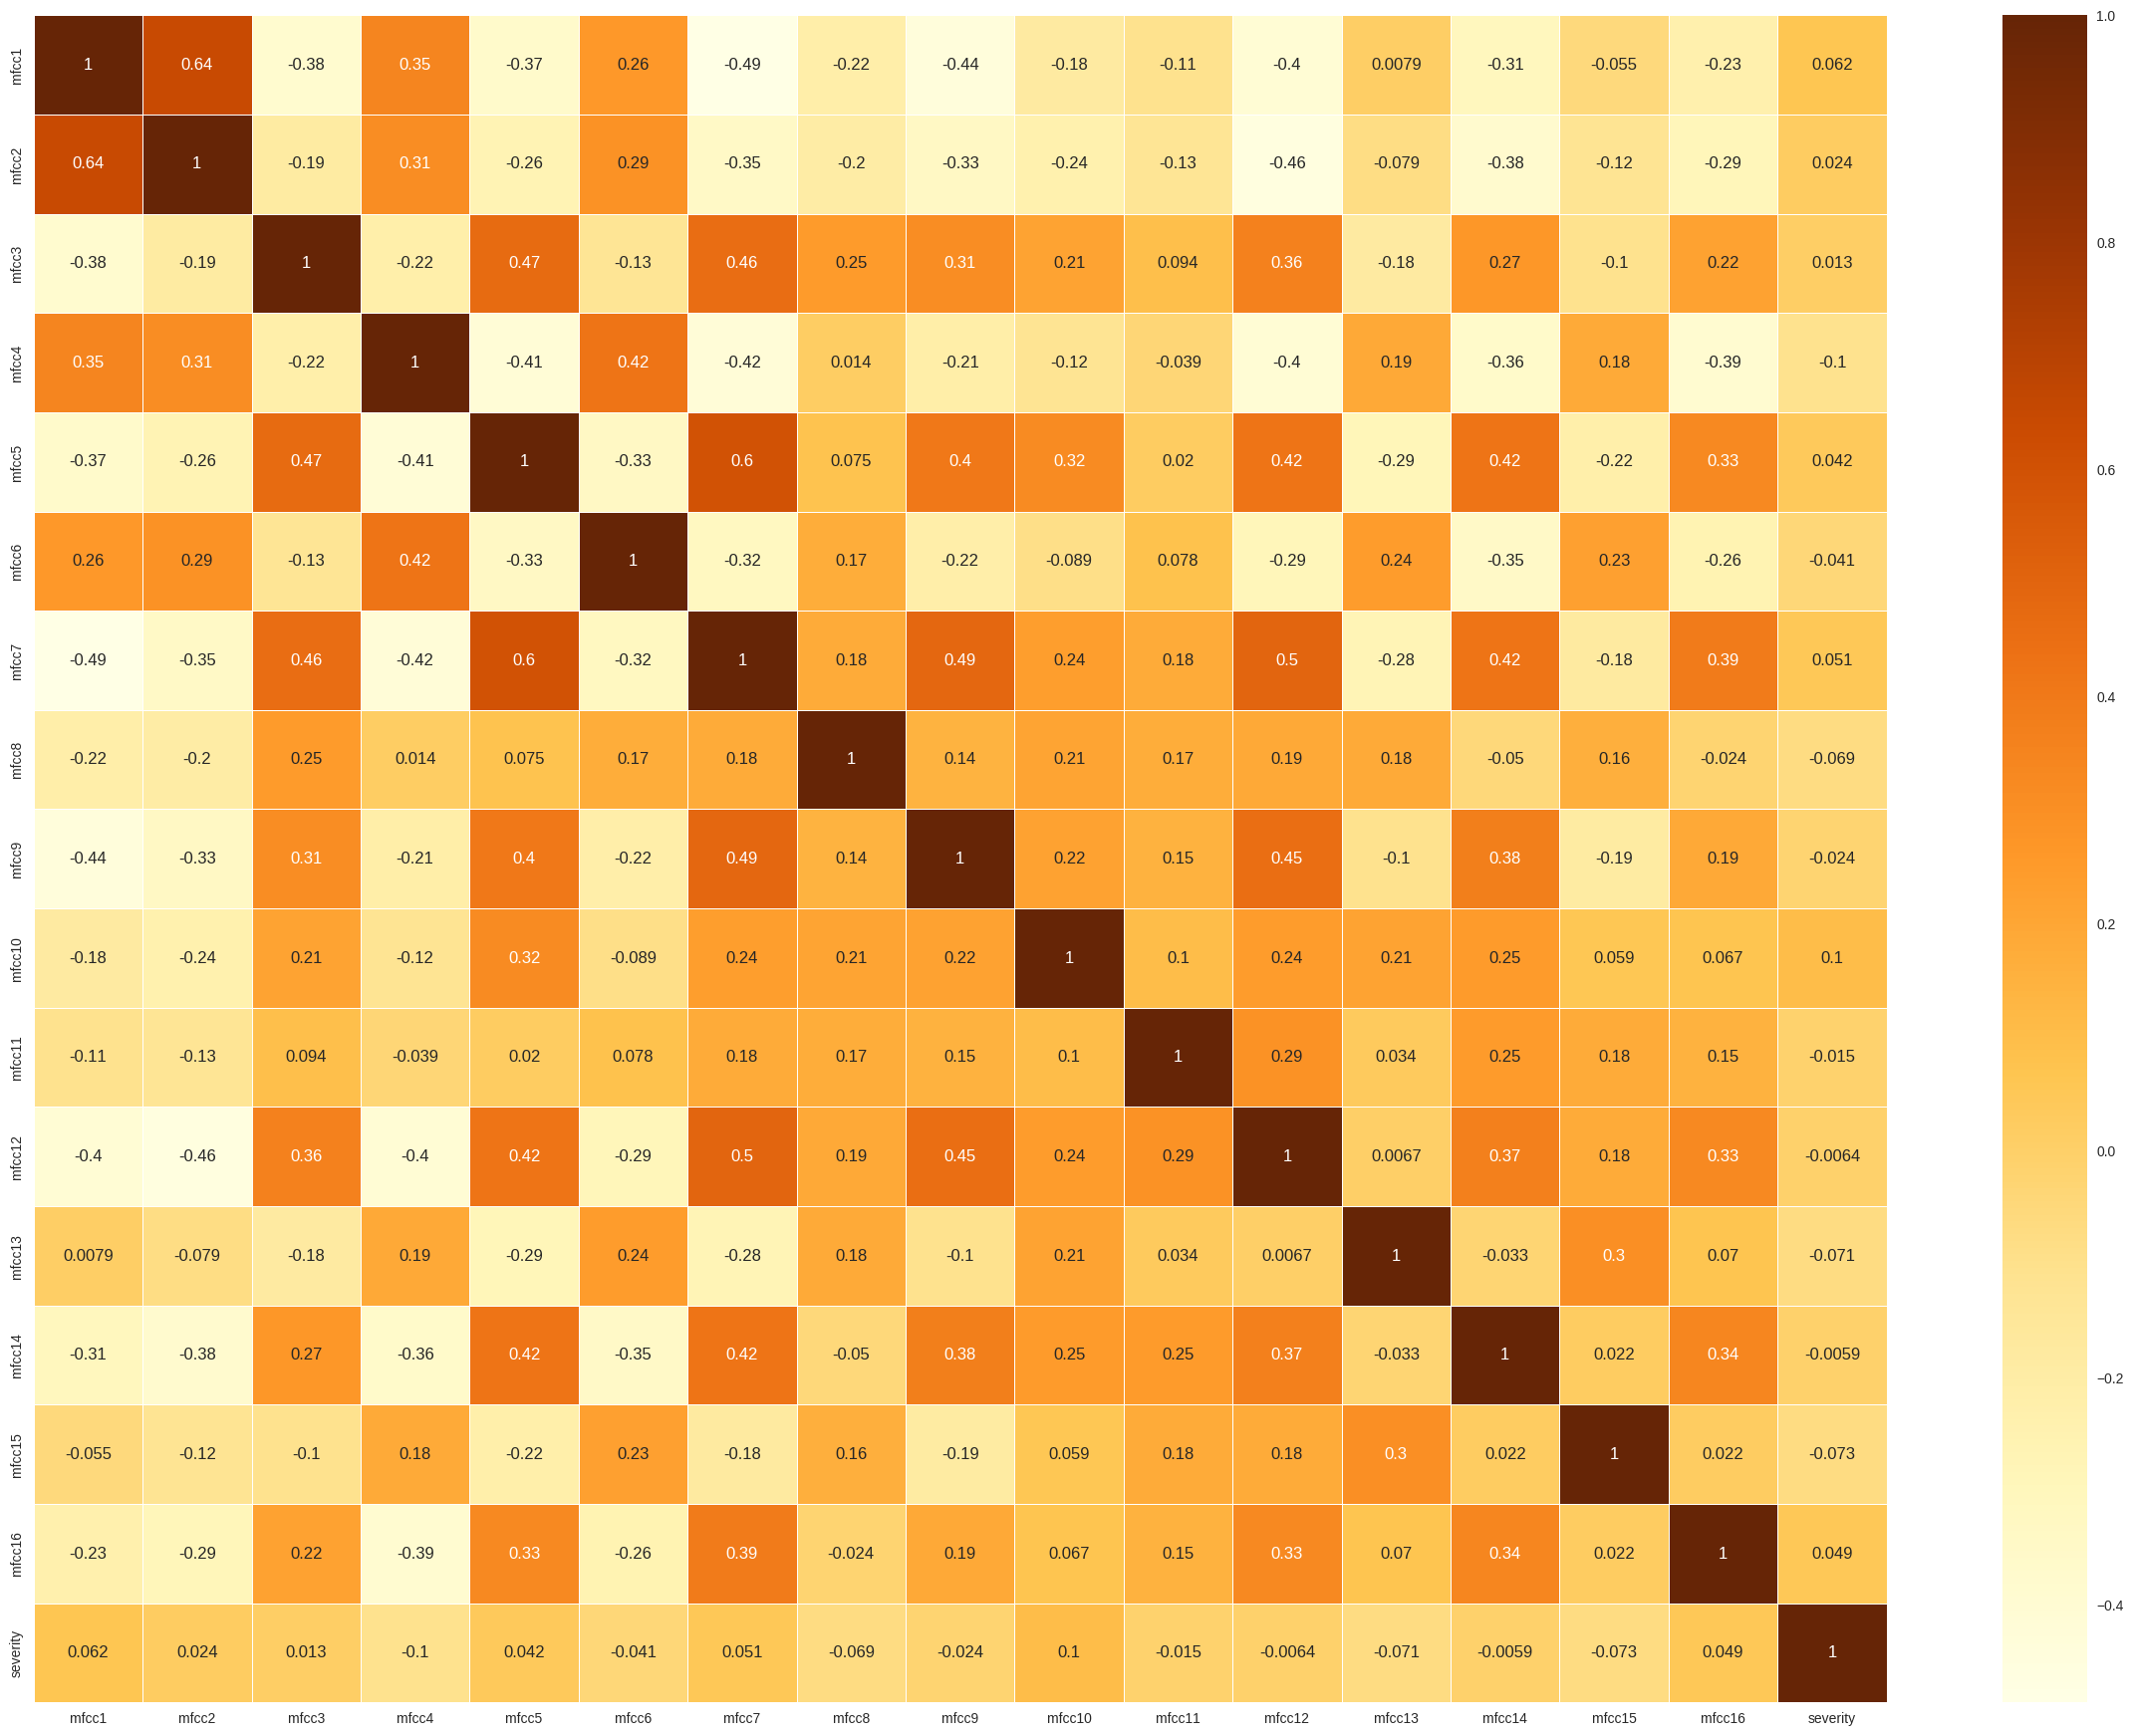

In [84]:
import seaborn as sns
plt.figure(figsize = (30,22))
sns.heatmap(data = extracted_features_df.corr(), cmap="YlOrBr", annot = True, linewidth = 0.5)

In [85]:
X = extracted_features_df.drop(["severity"], axis=1)
y = extracted_features_df["severity"]

In [86]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [87]:
X_train.shape

(368, 16)

In [88]:
X_test.shape

(159, 16)

In [89]:
y_train.shape

(368,)

In [90]:
y_test.shape

(159,)

In [92]:
df_train = X_train.assign(severity = y_train)
df_train.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,severity
196,-564.346497,17.631111,-11.976934,8.233951,-9.897474,5.808477,-9.352525,2.826615,-5.832080,-4.248109,3.701762,-4.989287,1.717953,-2.633807,1.105479,-2.397999,0
242,-470.774017,55.893230,-4.968334,11.579648,-12.325644,5.881375,-3.342293,-0.863914,-6.609631,-0.156122,-4.141251,-4.189216,1.769368,-6.299587,-0.757554,-4.068301,1
469,-391.142487,83.259613,-25.518852,-6.531608,-18.165380,7.075975,4.372828,-2.862302,-7.311562,-8.894136,-5.852639,-4.205998,-1.131563,-4.194144,-0.511598,-8.834048,0
34,-464.499542,32.090370,-10.359515,6.195846,2.250135,4.119073,-5.915275,-1.887913,-2.772237,2.111877,1.014694,-0.583354,-1.875564,-5.758933,1.569813,-3.620535,0
477,-554.302307,5.942412,-9.216882,12.269389,-12.637167,6.797860,-5.729613,-4.437688,-0.686747,-5.262191,0.433877,-3.931019,0.117717,-0.109322,-1.019254,-0.664428,0


In [93]:
df_test = X_test.assign(severity = y_test)
df_test.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,severity
225,-503.450043,37.242630,1.281717,16.576881,1.637378,5.908302,-5.502911,-4.250551,-9.464884,-7.956038,-6.481261,-6.884531,-5.743484,-8.299405,-4.341805,-5.668126,0
293,-424.217773,36.048553,-31.045347,7.685763,-16.364330,13.680722,-15.708736,0.417979,-10.122145,-7.637605,-2.952421,-4.857804,-3.956311,-10.876890,0.799259,-3.504969,1
302,-477.309601,46.126839,-21.762362,4.960389,-7.207521,-3.792079,-1.152234,-2.606064,-5.905710,-5.662396,-1.539494,-1.994754,1.026098,-3.031411,-1.343170,-1.090801,2
17,-428.842987,30.193771,-38.305588,21.190956,-16.920782,6.008684,-21.246998,-2.448432,-13.775843,-3.979797,-2.834096,-6.255645,-5.285066,-11.722040,5.306606,-3.828951,0
424,-458.391663,25.438688,-4.220140,4.598033,-10.357788,8.418617,-3.095902,0.597545,-7.505714,-2.856890,2.357148,-3.853561,1.729596,-1.736310,-1.633564,-1.622015,0


In [38]:
!pip install --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.1/72.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 87.4 MB/s eta 0:0

In [94]:
from pycaret.classification import *

s = setup(df_train, target = 'severity')

,Description,Value
0,Session id,1588
1,Target,severity
2,Target type,Multiclass
3,Original data shape,"(368, 17)"
4,Transformed data shape,"(368, 17)"
5,Transformed train set shape,"(257, 17)"
6,Transformed test set shape,"(111, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [95]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6694,0.5000,0.6694,0.4483,0.5369,0.0000,0.0000,0.0670
ridge,Ridge Classifier,0.6580,0.0000,0.6580,0.4747,0.5377,-0.0099,-0.0195,0.1000
rf,Random Forest Classifier,0.6502,0.4426,0.6502,0.4819,0.5422,-0.0068,-0.0120,0.6040
et,Extra Trees Classifier,0.6463,0.4759,0.6463,0.4966,0.5410,-0.0135,-0.0196,0.4120
lr,Logistic Regression,0.6425,0.4639,0.6425,0.4914,0.5392,-0.0000,-0.0100,0.5920
lda,Linear Discriminant Analysis,0.6388,0.4710,0.6388,0.4756,0.5317,-0.0124,-0.0238,0.0700
knn,K Neighbors Classifier,0.6145,0.4750,0.6145,0.4730,0.5260,-0.0570,-0.0675,0.0660
lightgbm,Light Gradient Boosting Machine,0.5918,0.3498,0.5918,0.4996,0.5310,-0.0562,-0.0631,0.5070
qda,Quadratic Discriminant Analysis,0.5843,0.4454,0.5843,0.5122,0.5380,-0.0230,-0.0193,0.0670
xgboost,Extreme Gradient Boosting,0.5726,0.3691,0.5726,0.4837,0.5164,-0.0923,-0.1017,0.3350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [96]:
finalize_model(best)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4',
                                             'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8',
                                             'mfcc9', 'mfcc10', 'mfcc11',
                                             'mfcc12', 'mfcc13', 'mfcc14',
                                             'mfcc15', 'mfcc16'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=Fals...
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 DummyClassifier(constant=None, random_state=1588,
                                 strategy='prior'))],
         verbose=False)

In [97]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [98]:
predict_model(best, df_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.6415,0,0.6415,0.4115,0.5014,0.0000,0.0000


,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,severity,prediction_label,prediction_score
225,-503.450043,37.242630,1.281717,16.576881,1.637378,5.908302,-5.502911,-4.250551,-9.464884,-7.956038,-6.481261,-6.884531,-5.743484,-8.299405,-4.341805,-5.668126,0,0,0.6693
293,-424.217773,36.048553,-31.045347,7.685763,-16.364330,13.680722,-15.708736,0.417979,-10.122145,-7.637605,-2.952421,-4.857804,-3.956311,-10.876890,0.799259,-3.504969,1,0,0.6693
302,-477.309601,46.126839,-21.762362,4.960389,-7.207521,-3.792079,-1.152234,-2.606064,-5.905710,-5.662396,-1.539494,-1.994754,1.026098,-3.031411,-1.343170,-1.090801,2,0,0.6693
17,-428.842987,30.193771,-38.305588,21.190956,-16.920782,6.008684,-21.246998,-2.448432,-13.775843,-3.979797,-2.834096,-6.255645,-5.285066,-11.722040,5.306606,-3.828951,0,0,0.6693
424,-458.391663,25.438688,-4.220140,4.598033,-10.357788,8.418617,-3.095902,0.597545,-7.505714,-2.856890,2.357148,-3.853561,1.729596,-1.736310,-1.633564,-1.622015,0,0,0.6693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,-477.141113,29.358572,-17.003649,19.056028,-16.627508,6.034992,-18.553747,-1.420731,-6.804400,-0.204376,-4.592718,-3.907645,-0.384192,-9.915396,-1.815331,-5.663036,0,0,0.6693
522,-354.408752,81.297447,6.758569,12.959607,-18.884579,17.487583,-20.863411,-7.496131,-8.061003,-5.605628,5.636711,-8.283680,-7.466475,-3.091458,2.415343,-6.163981,1,0,0.6693
240,-458.510895,42.345493,-1.827816,-1.292363,-3.816891,-3.740502,-1.806647,0.348026,-5.266021,-2.847857,0.323199,0.912180,-0.727108,-0.117547,-1.925947,-1.411320,0,0,0.6693
190,-315.802948,116.263420,-40.839489,21.167347,-27.731489,8.958459,-16.231676,-16.715630,-9.621078,-12.789212,-1.269773,-8.793578,-2.708796,-14.231439,-2.683248,-4.284443,1,0,0.6693


In [ ]:
# BEST MODEL = DUMMY CLASSIFIER - INDICATES PREDICTIONS ARE JUST RANDOM GUESSES


In [ ]:
# LET'S GO AHEAD AND TRAIN ANN CLASIFIER

In [99]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16
0,-452.610626,22.148582,-26.667784,14.294965,-11.275042,-4.616519,-9.429002,-5.581970,-4.823736,-1.983881,-3.111674,-2.568714,2.865866,-2.826376,-0.517783,-1.794053
1,-490.407593,46.116169,-10.762878,1.874184,2.817583,0.592210,-6.708392,-6.129557,-3.375265,-3.202446,-2.241224,-3.299662,-0.895146,-3.855475,-3.636161,-2.962979
2,-372.411011,70.084167,-6.788613,15.035032,-22.363907,30.576426,-29.808424,-7.844227,-10.131979,-9.631707,-12.262403,-9.298244,0.367706,-8.707373,-2.383633,-10.243588
3,-488.158783,17.670715,-1.707415,4.580669,-12.120718,2.679798,-3.528488,-1.293560,-1.336645,-2.632636,-2.568296,-3.983283,-1.052278,-1.877194,0.617954,-2.027632
4,-464.470673,33.050476,-13.767201,-2.279912,-5.500866,1.203839,-3.512835,-5.580782,0.718663,1.615429,-1.038447,-1.823261,0.998890,-4.956551,-2.084817,1.051466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,-354.408752,81.297447,6.758569,12.959607,-18.884579,17.487583,-20.863411,-7.496131,-8.061003,-5.605628,5.636711,-8.283680,-7.466475,-3.091458,2.415343,-6.163981
523,-402.803040,38.114639,-8.293879,13.660946,-16.565271,-0.299556,-10.985296,2.700624,-15.857039,-1.956247,1.459677,-4.333518,1.459953,-4.116962,4.151083,-2.959206
524,-454.446991,48.200497,8.506755,-2.231251,-10.038096,-5.274790,-14.275656,-12.535813,-9.707957,-7.859199,-13.065873,-5.256585,-6.131659,-6.516151,-7.514828,-4.362307
525,-606.841248,15.576273,5.150735,4.595417,1.235464,-1.233381,0.328511,0.008534,-3.731133,-1.617394,-0.793569,-2.303112,-0.200474,-3.242699,-1.102964,-0.950693


In [100]:
y

0      1
1      1
2      0
3      1
4      1
      ..
522    1
523    0
524    0
525    0
526    0
Name: severity, Length: 527, dtype: int64

In [101]:
### Label Encoding
y = np.array(pd.get_dummies(y))

In [102]:
y.shape

(527, 3)

In [103]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [104]:
from sklearn.model_selection import train_test_split
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=0)

In [105]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

### No of classes
num_labels = y.shape[1]

model=Sequential()
#First Layer
model.add(Dense(1024,input_shape=(16,)))
model.add(Activation('relu'))
model.add(Dropout(0.50))

#Second Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.30))

#Third Layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fourth Layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Final Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [106]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1024)              17408     
                                                                 
 activation_5 (Activation)   (None, 1024)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

In [107]:
# Compile the model with loss and optimizer
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [108]:
# Train the model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='each_expert_severity_label_ann.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
10/12 [========================>.....] - ETA: 0s - loss: 13.3596 - accuracy: 0.4812
Epoch 1: val_loss improved from inf to 6.99344, saving model to each_expert_severity_label_ann.hdf5
12/12 [==============================] - 2s 56ms/step - loss: 12.6238 - accuracy: 0.4918 - val_loss: 6.9934 - val_accuracy: 0.6076
Epoch 2/200
10/12 [========================>.....] - ETA: 0s - loss: 6.0909 - accuracy: 0.4719
Epoch 2: val_loss improved from 6.99344 to 1.34327, saving model to each_expert_severity_label_ann.hdf5
12/12 [==============================] - 0s 30ms/step - loss: 5.7694 - accuracy: 0.4946 - val_loss: 1.3433 - val_accuracy: 0.6076
Epoch 3/200
10/12 [========================>.....] - ETA: 0s - loss: 3.4052 - accuracy: 0.5688
Epoch 3: val_loss improved from 1.34327 to 0.86560, saving model to each_expert_severity_label_ann.hdf5
12/12 [==============================] - 0s 37ms/step - loss: 3.3400 - accuracy: 0.5625 - val_loss: 0.8656 - val_accuracy: 0.6076
Epoch 4/200
10/

In [109]:
# Check accuracy
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.675000011920929


In [155]:
y_predict = model.predict(X_test)

3/3 [==============================] - 0s 7ms/step


In [ ]:
# MODEL ANN WITH ACCURACY = 67.50 %

In [154]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1,

In [156]:
y_predict

array([[0.6167891 , 0.28918782, 0.0940231 ],
       [0.60743445, 0.28453875, 0.10802671],
       [0.6459827 , 0.30107382, 0.05294345],
       [0.62504286, 0.2924522 , 0.08250495],
       [0.6243293 , 0.29014483, 0.08552585],
       [0.6190865 , 0.28847432, 0.0924392 ],
       [0.6275077 , 0.29188824, 0.08060407],
       [0.62080365, 0.2897176 , 0.08947875],
       [0.5855005 , 0.27726325, 0.13723624],
       [0.62074524, 0.28961492, 0.08963986],
       [0.6333274 , 0.29515663, 0.07151596],
       [0.6258995 , 0.29203722, 0.08206326],
       [0.63176566, 0.2944681 , 0.07376622],
       [0.6390545 , 0.2966309 , 0.06431454],
       [0.6218568 , 0.2921351 , 0.08600817],
       [0.61749315, 0.28888714, 0.09361968],
       [0.63978064, 0.29689625, 0.06332295],
       [0.6264579 , 0.29186782, 0.08167422],
       [0.6236281 , 0.29148507, 0.08488692],
       [0.63630867, 0.29721993, 0.06647138],
       [0.626681  , 0.29076773, 0.08255117],
       [0.6281955 , 0.29338565, 0.07841872],
       [0.

In [157]:
pred_classes = []
for elem in y_predict:
    #print(elem)
    x1 = elem[0]
    x2 = elem[1]
    x3 = elem[2]
    if x1>x3:
        if x1>x2:
            max = x1
        else:
            max = x2
    else:
        if x3>x2:
            max = x3
        else:
            max = x2

    if max == x1:
        arr = [1,0,0]
    elif max == x2:
        arr = [0,1,0]
    else:
        arr = [0,0,1]

    pred_classes.append(arr)


In [158]:
pred_classes

[[1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0],
 [1, 0, 0]]

In [165]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, pred_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, pred_classes, average = "macro")
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, pred_classes, average = "macro")
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, pred_classes, average = "macro")
print('F1 score: %f' % f1)

Accuracy: 0.675000
Precision: 0.225000
Recall: 0.333333
F1 score: 0.268657


In [ ]:
# MODEL F1 score is quite low hence it doesnot perform well